# Ecuaciones diferenciales
Una ecuación diferencial es la relación que hay entre una función del tiempo y sus derivadas. Usualmente en este tipo de ecuaciones están presentes varias variables, como lo pueden ser:
- La variable independiente (normalmente corresponde al tiempo y se le denominada como $t$) 
- Una o más variables dependientes (por ejemplo $y$ o $x$)
- En algunos casos los parámetros. 

La forma usual para denotar las funciones diferenciales es: $\frac{dy}{dt}=f(t,y)$. 

Una solución a una ecuación diferencial es una función de la variable independiente que, al sustituirse como la variable dependiente, satisface todos los valores de la variable independiente en la ecuación. Es decir, una función $y(t)$ es una solución si: $\frac{dy}{dy} = f(t,y(t))$ 

### Campos de pendientes

Encontrar una solución analítica, es decir una ecuación, es una manera útil de poder describir una ecuación diferencial, sin embargo, hay otras alternativas de representar esas soluciones y a veces resultan más fáciles de entender y usar y una de esas alternativas son los campos de pendientes.
Si nos dan una función $f(t,y)$ podemos obtener una idea burda de las gráficas de las soluciones de esta ecuación, para ello seleccionamos puntos en el plano t-y y calculamos los números $f(t,y)$ de esos puntos. En cada punto $(t,y)$ seleccionado, usamos $f(t,y)$ para dibujar una linea minitangente cuya pendiente es $f(t,y)$, repitiendo este proceso con varios puntos tendremos una gran cantidad de dichas marcas minitangentes y con esto podemos visualizar como serian las gráficas de las soluciones.

### Planos fase 




# Visualización de campos de pendientes y planos fase

## Guía de uso

En la parte inferior podras encontrar un código que podras usar para ver los campos de pendientes y planos fase de ecuaciones diferenciales, para poder usarlo realice los siguientes pasos:

- Diríjase a la celda ubicada en la parte de abajo, la cual contiene el código, y de clic en cualquier parte.
- Oprima las teclas Ctrl y Enter al mismo tiempo para ejecutar el código, o también puede usar el botón de play en la parte superior (Run this cell and advance) para ejecutar todas las celdas.
- Una vez ejecutada la celda aparecerá el mensaje "¿Qué tipo de gráfica desea visualizar?" y deberá ingresar el número 1 o 2, dependiendo el tipo de gráfico que quiera ver, y dar Enter.
- Después deberá ingresar la ecuación o ecuaciones que desea visualizar, ingresándola en minúsculas.
- Una vez generada la gráfica puedes dar clic en cualquier parte dentro de la misma para ver la curva de solución que pasa por ese punto.
- Si desea visualizar otras ecuaciones u otro tipo de gráfica repita los mismos pasos.
      
## Consideraciones al utilizar el código
- Si se quiere trabajar con las funciones seno, coseno, logaritmo, etc. se debe ingresar de la siguiente manera:

seno = sin(), coseno = cos(), logaritmo = log(), exponencial = exp()

- Para trabajar con la multiplicación se debera usar *, ejemplo:

Para ingresar la ecuación 2y seria: 2*y

- Para trabajar con exponentes hay dos posibilidades: Usando ^ o **.

Si bien ambas funcionan, es preferible usar ** pues este es el operador para calcular exponentes en Python.


¿Qué tipo de gráfica deseas visualizar?
1. Campo de Pendientes (dy/dx = f(x, y))
2. Plano de Fase (dx/dt = f(x, y), dy/dt = g(x, y))


Ingresa 1 o 2:  2
Ingresa la ecuación para dx/dt en términos de 'x' e 'y' (ej: 'y', 'x - x*y'):  x+y
Ingresa la ecuación para dy/dt en términos de 'x' e 'y' (ej: '-x', 'x*y - y'):  y-x


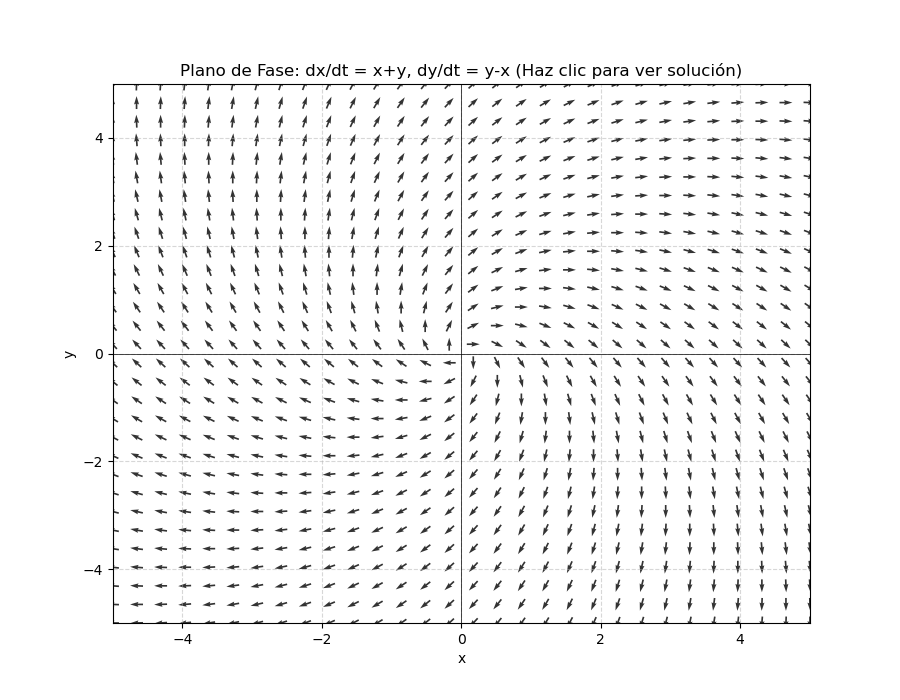

In [8]:
# AQUI SE ENCUENTRA EL CÓDIGO

import numpy as np
import matplotlib.pyplot as plt
import sympy
from scipy.integrate import odeint
 
# Esto lo utilizamos para poder activar la interactividad con las gráficas
%matplotlib widget

# Configuración para el espacio de la grafica
x_min, x_max = -5, 5  # Minimo y maximo del eje x
y_min, y_max = -5, 5  # minimo y maximo del eje y 
num_points = 30       # Densidad del campo de flechas

x_grid = np.linspace(x_min, x_max, num_points)     
y_grid = np.linspace(y_min, y_max, num_points)
X, Y = np.meshgrid(x_grid, y_grid)    # Creamos una cuadricula para la gráfica         

# Definimos los símbolos para SymPy
x_sym, y_sym, t_sym = sympy.symbols('x y t')

# Variables globales para las ecuaciones diferenciales (se establecerán por el usuario)
dxdt_func = None
dydt_func = None
dydx_func = None   # Añadimos esta para el campo de pendientes
current_plot_type = None   # 'slope_field' o 'phase_plane'
# Se define un pequeño buffer para permitir que las curvas se extiendan un poco más allá de los límites de visualización
plot_buffer = 0.5 # Se puede ajustar este valor (ej: 0.1, 0.2, 0.5, etc.)
                  # Un valor de 0.5 significa 0.5 unidades más allá del límite en cada dirección.

# Definimos un límite máximo para la magnitud del vector de velocidad en el plano de fase
max_phase_plane_speed_magnitude = 100.0 # Se puede ajustar este valor según sea necesario (ej: 50.0, 100.0, 200.0)    
    
# Función para resolver el sistema de EDOs (para plano de fase)
def system_ode(state, t, func_dx, func_dy):
    x, y = state

    # Calcula las derivadas (sin modificar aún)
    dxdt_raw = func_dx(x, y)
    dydt_raw = func_dy(x, y)

    # Vamos a recortar la magnitud del vector 
    # Manejar NaNs e Infs en las derivadas individuales primero
    if np.isnan(dxdt_raw) or np.isnan(dydt_raw):
        return [0.0, 0.0] # Si alguna es NaN, devolver [0,0] para evitar problemas

    # Calcular la magnitud (rapidez) del vector
    current_speed = np.sqrt(dxdt_raw**2 + dydt_raw**2)

    # Evitar división por cero si la velocidad es 0
    if current_speed == 0:
        return [0.0, 0.0]

    # Si la velocidad excede el límite (o es infinita), recortar
    if current_speed > max_phase_plane_speed_magnitude or np.isinf(current_speed):
        # Normalizar el vector a la magnitud máxima deseada, manteniendo la dirección
        dxdt_clipped = (dxdt_raw / current_speed) * max_phase_plane_speed_magnitude
        dydt_clipped = (dydt_raw / current_speed) * max_phase_plane_speed_magnitude
        return [dxdt_clipped, dydt_clipped]
    else:
        # Si la velocidad está dentro del límite, usar los valores originales
        return [dxdt_raw, dydt_raw]

# Función adaptada para campo de pendientes (dy/dx = f(x,y))
def simple_ode_for_slope_field(state, t, func_dydx):
    x_val, y_val = state
    
    try:
        dy_dx_val = func_dydx(x_val, y_val)
        
        # Vamos a recortar la pendiente para evitar valores extremos
        # Tambien definimos un límite máximo para la magnitud de la pendiente
        max_slope_magnitude = 100.0 # Ajustar este valor si es necesario
        
        if np.isinf(dy_dx_val):
            # Si es infinito, recortar a max_slope_magnitude con el signo correcto
            dy_dx_val = np.copysign(max_slope_magnitude, dy_dx_val)
        elif np.isnan(dy_dx_val):
            dy_dx_val = 0.0 # O un valor seguro si es NaN
        else:
            # Recortar si la magnitud de la pendiente excede el límite
            if abs(dy_dx_val) > max_slope_magnitude:
                dy_dx_val = np.copysign(max_slope_magnitude, dy_dx_val)
                
    except Exception:
        # En caso de error de cálculo, devolver valores que no causen problemas
        dy_dx_val = 0.0 

    return [1.0, dy_dx_val]


# Función para poder interactuar con los clics
def onclick_handler(event):
    global dydx_func 

    if event.inaxes == ax: 
        x_click, y_click = event.xdata, event.ydata
        print(f"Clic en: ({x_click:.2f}, {y_click:.2f})")

        # Configuración de tolerancias para odeint (ayudan a que no se obtengan curvas tan erráticas)
        rtol_val = 1e-8 # Tolerancia relativa 
        atol_val = 1e-9 # Tolerancia absoluta 

        # Marca el punto inicial
        ax.plot(x_click, y_click, 'ro', markersize=5)


        if current_plot_type == 'phase_plane' and dxdt_func and dydt_func:
            # Traza la trayectoria para el plano de fase
            # Integramos hacia adelante
            t_span_forward = np.linspace(0, 15, 300) 
            try:
                sol_forward = odeint(system_ode, [x_click, y_click], t_span_forward,
                                     args=(dxdt_func, dydt_func), mxstep=5000, rtol=rtol_val, atol=atol_val)
                # Filtrar NaNs e Infs y también valores fuera de los límites del plot
                sol_forward = sol_forward[~np.isnan(sol_forward).any(axis=1)]
                sol_forward = sol_forward[~np.isinf(sol_forward).any(axis=1)]
                sol_forward = sol_forward[(sol_forward[:, 0] >= x_min - plot_buffer) & # Se agrega un poco de tolerancia para
                                          (sol_forward[:, 0] <= x_max + plot_buffer) & # que las curvas puedan "salir" de la
                                          (sol_forward[:, 1] >= y_min - plot_buffer) & # grafica y mejorar la visualización
                                          (sol_forward[:, 1] <= y_max + plot_buffer)]
                if len(sol_forward) > 1:
                    ax.plot(sol_forward[:, 0], sol_forward[:, 1], 'red', linewidth=1.5, alpha=0.8)
            except Exception as e:
                print(f"Error al trazar trayectoria hacia adelante desde ({x_click:.2f}, {y_click:.2f}): {e}")

            # Integramos hacia atrás
            t_span_backward = np.linspace(0, -15, 300) 
            try:
                sol_backward = odeint(system_ode, [x_click, y_click], t_span_backward,
                                      args=(dxdt_func, dydt_func), mxstep=5000, rtol=rtol_val, atol=atol_val)
                # Filtrar NaNs e Infs y también valores fuera de los límites del plot
                sol_backward = sol_backward[~np.isnan(sol_backward).any(axis=1)]
                sol_backward = sol_backward[~np.isinf(sol_backward).any(axis=1)]
                sol_backward = sol_backward[(sol_backward[:, 0] >= x_min - plot_buffer) & # Se agrega un poco de tolerancia para
                                            (sol_backward[:, 0] <= x_max + plot_buffer) & # que las curvas puedan "salir" de la
                                            (sol_backward[:, 1] >= y_min - plot_buffer) & # grafica y mejorar la visualización
                                            (sol_backward[:, 1] <= y_max + plot_buffer)]
                if len(sol_backward) > 1:
                    ax.plot(sol_backward[::-1, 0], sol_backward[::-1, 1], 'red', linewidth=1.5, alpha=0.8)
            except Exception as e:
                print(f"Error al trazar trayectoria hacia atrás desde ({x_click:.2f}, {y_click:.2f}): {e}")

            fig.canvas.draw_idle() 

        elif current_plot_type == 'slope_field' and dydx_func:
            # Para campos de pendientes, odeint traza una curva de solución
            # Simular hacia adelante desde x_click
            x_span_forward = np.linspace(x_click, x_max, 200) 
            if len(x_span_forward) > 1: 
                try:
                    sol_forward = odeint(simple_ode_for_slope_field, [x_click, y_click], x_span_forward,
                                         args=(dydx_func,), mxstep=5000, rtol=rtol_val, atol=atol_val)
                    # Filtrar NaNs e Infs y también valores fuera de los límites del plot
                    sol_forward = sol_forward[~np.isnan(sol_forward).any(axis=1)]
                    sol_forward = sol_forward[~np.isinf(sol_forward).any(axis=1)]
                    sol_forward = sol_forward[(sol_forward[:, 0] >= x_min - plot_buffer) & 
                                              (sol_forward[:, 0] <= x_max + plot_buffer) &
                                              (sol_forward[:, 1] >= y_min - plot_buffer) & 
                                              (sol_forward[:, 1] <= y_max + plot_buffer)]
                    if len(sol_forward) > 1:
                        ax.plot(sol_forward[:, 0], sol_forward[:, 1], 'red', linewidth=1.5, alpha=0.8)
                except Exception as e:
                    print(f"Error al trazar trayectoria hacia adelante desde ({x_click:.2f}, {y_click:.2f}): {e}")

            # Simular hacia atrás desde x_click
            x_span_backward = np.linspace(x_click, x_min, 200) 
            if len(x_span_backward) > 1: 
                try:
                    sol_backward = odeint(simple_ode_for_slope_field, [x_click, y_click], x_span_backward,
                                         args=(dydx_func,), mxstep=5000, rtol=rtol_val, atol=atol_val)
                    # Filtrar NaNs e Infs y también valores fuera de los límites del plot
                    sol_backward = sol_backward[~np.isnan(sol_backward).any(axis=1)]
                    sol_backward = sol_backward[~np.isinf(sol_backward).any(axis=1)]
                    sol_backward = sol_backward[(sol_backward[:, 0] >= x_min - plot_buffer) & 
                                                (sol_backward[:, 0] <= x_max + plot_buffer) &
                                                (sol_backward[:, 1] >= y_min - plot_buffer) &
                                                (sol_backward[:, 1] <= y_max + plot_buffer)]
                    if len(sol_backward) > 1:
                        ax.plot(sol_backward[:, 0], sol_backward[:, 1], 'red', linewidth=1.5, alpha=0.8)
                except Exception as e:
                    print(f"Error al trazar trayectoria hacia atrás desde ({x_click:.2f}, {y_click:.2f}): {e}")

            fig.canvas.draw_idle() 
        else:
            print("Función de EDO no definida o tipo de gráfico incorrecto para el clic.")


# Interacción con el Usuario 
print("¿Qué tipo de gráfica deseas visualizar?")
print("1. Campo de Pendientes (dy/dx = f(x, y))")
print("2. Plano de Fase (dx/dt = f(x, y), dy/dt = g(x, y))")

opcion = input("Ingresa 1 o 2: ")

fig, ax = plt.subplots(figsize=(9, 7)) # Crea la figura y los ejes de Matplotlib

if opcion == '1':
    current_plot_type = 'slope_field'
    ecuacion_str = input("Ingresa la ecuación diferencial para dy/dx en términos de 'x' e 'y' (ej: 'x - y', 'sin(y)'): ")

    try:
        expr = sympy.sympify(ecuacion_str)
        dydx_func = sympy.lambdify((x_sym, y_sym), expr, 'numpy') 

        # Calcular las pendientes para el campo
        with np.errstate(divide='ignore', invalid='ignore'): 
            V = dydx_func(X, Y)
            V[np.isinf(V)] = np.copysign(1e10, V[np.isinf(V)]) 
            V[np.isnan(V)] = 0.0 

        U = np.ones_like(X) 

        magnitud = np.sqrt(U**2 + V**2)
        U_norm = np.divide(U, magnitud, out=np.zeros_like(U), where=magnitud!=0)
        V_norm = np.divide(V, magnitud, out=np.zeros_like(V), where=magnitud!=0)

        ax.quiver(X, Y, U_norm, V_norm, color='blue', alpha=0.7)
        ax.set_title(f'Campo de Pendientes: dy/dx = {ecuacion_str} (Haz clic para ver solución)')

    except (sympy.SympifyError, TypeError, NameError) as e:
        print(f"Error al procesar la ecuación. Asegúrate de usar 'x' e 'y' y una sintaxis matemática válida. Error: {e}")
        plt.close(fig) 
        exit()

elif opcion == '2':
    current_plot_type = 'phase_plane'
    ecuacion_dx_str = input("Ingresa la ecuación para dx/dt en términos de 'x' e 'y' (ej: 'y', 'x - x*y'): ")
    ecuacion_dy_str = input("Ingresa la ecuación para dy/dt en términos de 'x' e 'y' (ej: '-x', 'x*y - y'): ")

    try:
        expr_dx = sympy.sympify(ecuacion_dx_str)
        expr_dy = sympy.sympify(ecuacion_dy_str)

        dxdt_func = sympy.lambdify((x_sym, y_sym), expr_dx, 'numpy') 
        dydt_func = sympy.lambdify((x_sym, y_sym), expr_dy, 'numpy') 

        # Calcular los vectores para el plano de fase
        with np.errstate(divide='ignore', invalid='ignore'):
            U_phase = dxdt_func(X, Y)
            V_phase = dydt_func(X, Y)
            U_phase[np.isinf(U_phase)] = np.copysign(1e10, U_phase[np.isinf(U_phase)])
            U_phase[np.isnan(U_phase)] = 0.0
            V_phase[np.isinf(V_phase)] = np.copysign(1e10, V_phase[np.isinf(V_phase)])
            V_phase[np.isnan(V_phase)] = 0.0

        magnitude_phase = np.sqrt(U_phase**2 + V_phase**2)
        U_norm_phase = np.divide(U_phase, magnitude_phase, out=np.zeros_like(U_phase), where=magnitude_phase!=0)
        V_norm_phase = np.divide(V_phase, magnitude_phase, out=np.zeros_like(V_phase), where=magnitude_phase!=0)

        quiver_plot = ax.quiver(X, Y, U_norm_phase, V_norm_phase, alpha=0.8, pivot='mid')
        ax.set_title(f'Plano de Fase: dx/dt = {ecuacion_dx_str}, dy/dt = {ecuacion_dy_str} (Haz clic para ver solución)')

    except (sympy.SympifyError, TypeError, NameError) as e:
        print(f"Error al procesar las ecuaciones. Asegúrate de usar 'x' e 'y' y una sintaxis matemática válida. Error: {e}")
        plt.close(fig)
        exit()

else:
    print("Opción no válida. Por favor, ingresa '1' o '2'.")
    exit()

# Configuración común para la gráfico 
ax.axvline(0, color='k', linewidth=0.5)
ax.axhline(0, color='k', linewidth=0.5)
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.grid(True, linestyle='--', alpha=0.5)

# Conecta el evento de clic 
fig.canvas.mpl_connect('button_press_event', onclick_handler)

# Muestra la grafica
plt.show()